# Clustering is of main interest for this notebook

In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
import seaborn as sns

In [248]:
df = pd.read_csv('Price_ADD - scoresAdded.csv')

In [249]:
df.head()

,Brand,Model,Price,Released,Mass,Platform,Operating System,CPU Clock,Processor,Processor Score,RAM Capacity (converted),Non-volatile Memory Capacity (converted),RAM Type,Display Diagonal,Resolution,Pixel Density,Display Type,Graphical Controller,GPU Scores,Microphone(s),Loudpeaker(s):,Audio Output:,Expansion Interfaces,USB Connector,Max. Charging Power:,Nominal Battery Capacity,Image Sensor Pixel Size,No. of effective pixels,Aperture (W),Camera Extra Functions,Camera Extra Feat.,Secondary No. of pixels,Built-in compass,Built-in gyroscope,Voice Command,Augmented Reality (AR),Intelligent personal assistant,Voice Recognition,Face Recognition,Barometer,In-screen fingerprint sensor,Hall,Heart rate sensor,Fingerprint sensor,Light sensor,Proximity sensor,Step counter,Display_Score,Performance_Score,Camera_Score,Battery_Score
0,Apple,iPhone 11 A2221 ...,55999,19-Sep,194.0,iOS,Apple iOS 13,2650,A13 Bionic,472507,4,128,4,155.0,828x1792,323,0,Apple A13 Bionic...,208697.0,3,2,0,0,0,18.0,3110,1.4,12.2,1.8,"EIS (video)\n , ...",16,12.2,1,1,1,1,1,1,1,1,0,0,0,0,1,1,0,32300,715704.0,8066.666667,21110
1,Apple,iPhone 11 A2221 ...,69990,19-Sep,194.0,iOS,Apple iOS 13,2650,A13 Bionic,472507,4,256,4,155.0,828x1792,323,0,Apple A13 Bionic...,208697.0,3,2,0,0,0,18.0,3110,1.4,12.2,1.8,"EIS (video)\n , ...",16,12.2,1,1,1,1,1,1,1,1,0,0,0,0,1,1,0,32300,715704.0,8066.666667,21110
2,Apple,iPhone 11 A2221 ...,50999,19-Sep,194.0,iOS,Apple iOS 13,2650,A13 Bionic,472507,4,64,4,155.0,828x1792,323,0,Apple A13 Bionic...,208697.0,3,2,0,0,0,18.0,3110,1.4,12.2,1.8,"EIS (video)\n , ...",16,12.2,1,1,1,1,1,1,1,1,0,0,0,0,1,1,0,32300,715704.0,8066.666667,21110
3,Apple,iPhone 11 Pro A2...,92999,19-Sep,188.0,iOS,Apple iOS 13,2650,A13 Bionic,472507,4,256,4,147.0,1125x2436,464,1,Apple A13 Bionic...,208697.0,3,2,0,0,0,18.0,3046,1.4,12.2,1.8,"EIS (video)\n , ...",16,12.2,1,1,1,1,1,1,1,1,0,0,0,0,1,1,0,46401,715704.0,8066.666667,21046
4,Apple,iPhone 11 Pro A2...,109999,19-Sep,188.0,iOS,Apple iOS 13,2650,A13 Bionic,472507,4,512,4,147.0,1125x2436,464,1,Apple A13 Bionic...,208697.0,3,2,0,0,0,18.0,3046,1.4,12.2,1.8,"EIS (video)\n , ...",16,12.2,1,1,1,1,1,1,1,1,0,0,0,0,1,1,0,46401,715704.0,8066.666667,21046


## Camera Scoring and Clustering

In [250]:
# -1 : Battery_Score
# -2 : Camera_Score
# -3 : Performance_Score
# -4 : Display_Score
df['Camera Prefs'] = df['Battery_Score'] + 100 * df['Camera_Score'] + df['Performance_Score'] + df['Display_Score']

In [251]:
df.head()

,Brand,Model,Price,Released,Mass,Platform,Operating System,CPU Clock,Processor,Processor Score,RAM Capacity (converted),Non-volatile Memory Capacity (converted),RAM Type,Display Diagonal,Resolution,Pixel Density,Display Type,Graphical Controller,GPU Scores,Microphone(s),Loudpeaker(s):,Audio Output:,Expansion Interfaces,USB Connector,Max. Charging Power:,Nominal Battery Capacity,Image Sensor Pixel Size,No. of effective pixels,Aperture (W),Camera Extra Functions,Camera Extra Feat.,Secondary No. of pixels,Built-in compass,Built-in gyroscope,Voice Command,Augmented Reality (AR),Intelligent personal assistant,Voice Recognition,Face Recognition,Barometer,In-screen fingerprint sensor,Hall,Heart rate sensor,Fingerprint sensor,Light sensor,Proximity sensor,Step counter,Display_Score,Performance_Score,Camera_Score,Battery_Score,Camera Prefs
0,Apple,iPhone 11 A2221 ...,55999,19-Sep,194.0,iOS,Apple iOS 13,2650,A13 Bionic,472507,4,128,4,155.0,828x1792,323,0,Apple A13 Bionic...,208697.0,3,2,0,0,0,18.0,3110,1.4,12.2,1.8,"EIS (video)\n , ...",16,12.2,1,1,1,1,1,1,1,1,0,0,0,0,1,1,0,32300,715704.0,8066.666667,21110,1.575781e+06
1,Apple,iPhone 11 A2221 ...,69990,19-Sep,194.0,iOS,Apple iOS 13,2650,A13 Bionic,472507,4,256,4,155.0,828x1792,323,0,Apple A13 Bionic...,208697.0,3,2,0,0,0,18.0,3110,1.4,12.2,1.8,"EIS (video)\n , ...",16,12.2,1,1,1,1,1,1,1,1,0,0,0,0,1,1,0,32300,715704.0,8066.666667,21110,1.575781e+06
2,Apple,iPhone 11 A2221 ...,50999,19-Sep,194.0,iOS,Apple iOS 13,2650,A13 Bionic,472507,4,64,4,155.0,828x1792,323,0,Apple A13 Bionic...,208697.0,3,2,0,0,0,18.0,3110,1.4,12.2,1.8,"EIS (video)\n , ...",16,12.2,1,1,1,1,1,1,1,1,0,0,0,0,1,1,0,32300,715704.0,8066.666667,21110,1.575781e+06
3,Apple,iPhone 11 Pro A2...,92999,19-Sep,188.0,iOS,Apple iOS 13,2650,A13 Bionic,472507,4,256,4,147.0,1125x2436,464,1,Apple A13 Bionic...,208697.0,3,2,0,0,0,18.0,3046,1.4,12.2,1.8,"EIS (video)\n , ...",16,12.2,1,1,1,1,1,1,1,1,0,0,0,0,1,1,0,46401,715704.0,8066.666667,21046,1.589818e+06
4,Apple,iPhone 11 Pro A2...,109999,19-Sep,188.0,iOS,Apple iOS 13,2650,A13 Bionic,472507,4,512,4,147.0,1125x2436,464,1,Apple A13 Bionic...,208697.0,3,2,0,0,0,18.0,3046,1.4,12.2,1.8,"EIS (video)\n , ...",16,12.2,1,1,1,1,1,1,1,1,0,0,0,0,1,1,0,46401,715704.0,8066.666667,21046,1.589818e+06


In [252]:
# specify the index of columns u want here
X = df.iloc[:, [2,-1]].values

In [253]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(X)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

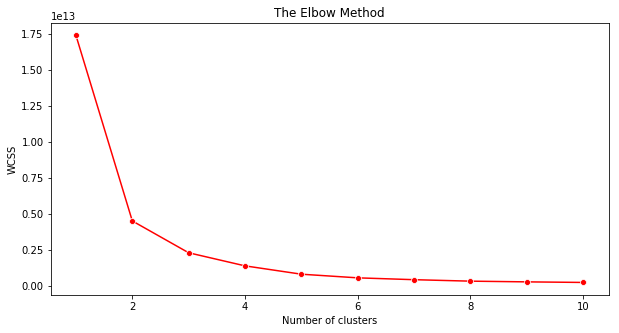

In [254]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [261]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)

In [262]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 0, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 0])

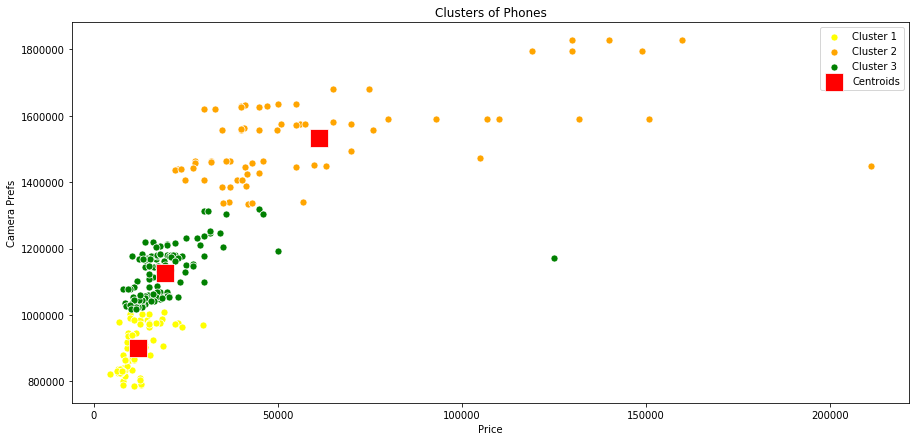

In [263]:
# Visualising the clusters
fig, ax = plt.subplots(figsize=(15,7))
# fig, ax = plt.figure(figsize=(15,7))
sns.scatterplot(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], color = 'orange', label = 'Cluster 2',s=50)
sns.scatterplot(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], color = 'grey', label = 'Cluster 4',s=50)
sns.scatterplot(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], color = 'blue', label = 'Cluster 5',s=50)
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=300,marker=',')
plt.grid(False)
plt.title('Clusters of Phones')
plt.xlabel('Price')
plt.ylabel('Camera Prefs')
plt.legend()
fig.savefig("Figures\\Camera Prefs", bbox_inches='tight',pad_inches=0.1)
plt.show()

## Battery Scoring and Clustering

In [170]:
# -1 : Battery_Score
# -2 : Camera_Score
# -3 : Performance_Score
# -4 : Display_Score
df['Battery Prefs'] = 100 * df['Battery_Score'] + df['Camera_Score'] + df['Performance_Score'] + df['Display_Score']

In [217]:
df.head()

,Brand,Model,Price,Released,Mass,Platform,Operating System,CPU Clock,Processor,Processor Score,RAM Capacity (converted),Non-volatile Memory Capacity (converted),RAM Type,Display Diagonal,Resolution,Pixel Density,Display Type,Graphical Controller,GPU Scores,Microphone(s),Loudpeaker(s):,Audio Output:,Expansion Interfaces,USB Connector,Max. Charging Power:,Nominal Battery Capacity,Image Sensor Pixel Size,No. of effective pixels,Aperture (W),Camera Extra Functions,Camera Extra Feat.,Secondary No. of pixels,Built-in compass,Built-in gyroscope,Voice Command,Augmented Reality (AR),Intelligent personal assistant,Voice Recognition,Face Recognition,Barometer,In-screen fingerprint sensor,Hall,Heart rate sensor,Fingerprint sensor,Light sensor,Proximity sensor,Step counter,Display_Score,Performance_Score,Camera_Score,Battery_Score,Camera Prefs,Battery Prefs,Performance Prefs,Display Prefs
0,Apple,iPhone 11 A2221 ...,55999,19-Sep,194.0,iOS,Apple iOS 13,2650,A13 Bionic,472507,4,128,4,155.0,828x1792,323,0,Apple A13 Bionic...,208697.0,3,2,0,0,0,18.0,3110,1.4,12.2,1.8,"EIS (video)\n , ...",16,12.2,1,1,1,1,1,1,1,1,0,0,0,0,1,1,0,32300,715704.0,8066.666667,21110,1.575781e+06,2.867071e+06,7.163188e+07,3.974881e+06
1,Apple,iPhone 11 A2221 ...,69990,19-Sep,194.0,iOS,Apple iOS 13,2650,A13 Bionic,472507,4,256,4,155.0,828x1792,323,0,Apple A13 Bionic...,208697.0,3,2,0,0,0,18.0,3110,1.4,12.2,1.8,"EIS (video)\n , ...",16,12.2,1,1,1,1,1,1,1,1,0,0,0,0,1,1,0,32300,715704.0,8066.666667,21110,1.575781e+06,2.867071e+06,7.163188e+07,3.974881e+06
2,Apple,iPhone 11 A2221 ...,50999,19-Sep,194.0,iOS,Apple iOS 13,2650,A13 Bionic,472507,4,64,4,155.0,828x1792,323,0,Apple A13 Bionic...,208697.0,3,2,0,0,0,18.0,3110,1.4,12.2,1.8,"EIS (video)\n , ...",16,12.2,1,1,1,1,1,1,1,1,0,0,0,0,1,1,0,32300,715704.0,8066.666667,21110,1.575781e+06,2.867071e+06,7.163188e+07,3.974881e+06
3,Apple,iPhone 11 Pro A2...,92999,19-Sep,188.0,iOS,Apple iOS 13,2650,A13 Bionic,472507,4,256,4,147.0,1125x2436,464,1,Apple A13 Bionic...,208697.0,3,2,0,0,0,18.0,3046,1.4,12.2,1.8,"EIS (video)\n , ...",16,12.2,1,1,1,1,1,1,1,1,0,0,0,0,1,1,0,46401,715704.0,8066.666667,21046,1.589818e+06,2.874772e+06,7.164591e+07,5.384917e+06
4,Apple,iPhone 11 Pro A2...,109999,19-Sep,188.0,iOS,Apple iOS 13,2650,A13 Bionic,472507,4,512,4,147.0,1125x2436,464,1,Apple A13 Bionic...,208697.0,3,2,0,0,0,18.0,3046,1.4,12.2,1.8,"EIS (video)\n , ...",16,12.2,1,1,1,1,1,1,1,1,0,0,0,0,1,1,0,46401,715704.0,8066.666667,21046,1.589818e+06,2.874772e+06,7.164591e+07,5.384917e+06


In [234]:
# specify the index of columns u want here
X = df.iloc[:, [2,-3]].values

In [235]:
X

array([[5.59990000e+04, 2.86707067e+06],
       [6.99900000e+04, 2.86707067e+06],
       [5.09990000e+04, 2.86707067e+06],
       [9.29990000e+04, 2.87477167e+06],
       [1.09999000e+05, 2.87477167e+06],
       [7.99990000e+04, 2.87477167e+06],
       [1.31900000e+05, 2.96627167e+06],
       [1.50800000e+05, 2.96627167e+06],
       [1.06999000e+05, 2.96627167e+06],
       [1.19000000e+05, 3.17335100e+06],
       [1.29900000e+05, 3.17335100e+06],
       [1.49000000e+05, 3.17335100e+06],
       [1.29900000e+05, 3.26065100e+06],
       [1.39900000e+05, 3.26065100e+06],
       [1.59900000e+05, 3.26065100e+06],
       [3.99000000e+04, 2.73719067e+06],
       [4.99000000e+04, 2.73719067e+06],
       [3.49000000e+04, 2.73719067e+06],
       [5.49990000e+04, 4.45467391e+06],
       [4.99990000e+04, 4.45467391e+06],
       [4.69990000e+04, 4.45067391e+06],
       [3.99990000e+04, 4.45067391e+06],
       [6.29990000e+04, 4.26962591e+06],
       [4.09990000e+04, 4.26562591e+06],
       [2.111370

In [236]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(X)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

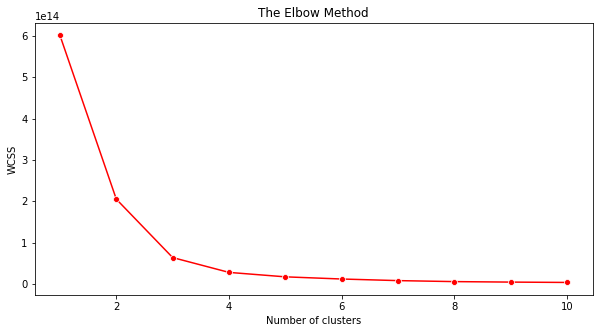

In [237]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [238]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)

In [239]:
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       2, 2, 0, 0])

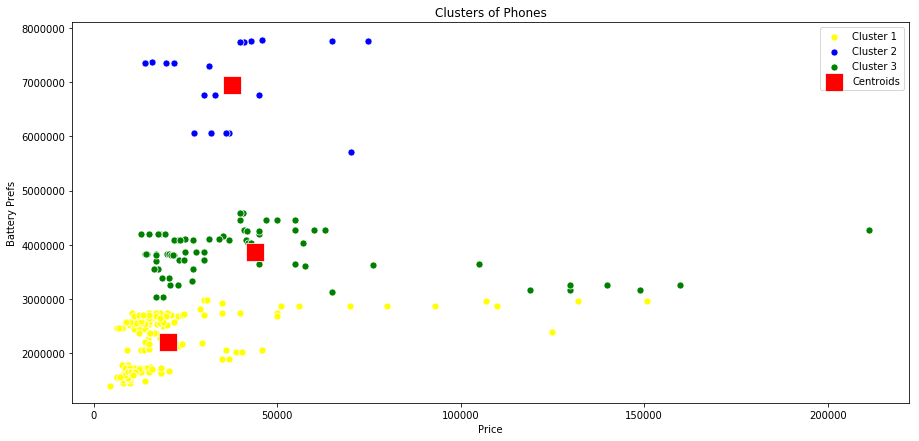

In [240]:
# Visualising the clusters
# plt.figure(figsize=(15,7))
fig, ax = plt.subplots(figsize=(15,7))
sns.scatterplot(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], color = 'grey', label = 'Cluster 4',s=50)
sns.scatterplot(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], color = 'orange', label = 'Cluster 5',s=50)
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=300,marker=',')
plt.grid(False)
plt.title('Clusters of Phones')
plt.xlabel('Price')
plt.ylabel('Battery Prefs')
plt.legend()
fig.savefig("Figures\\Battery Prefs", bbox_inches='tight',pad_inches=0.1)
plt.show()

## Performance Scoring and Clustering

In [264]:
# -1 : Battery_Score
# -2 : Camera_Score
# -3 : Performance_Score
# -4 : Display_Score
df['Performance Prefs'] = df['Battery_Score'] + df['Camera_Score'] + 100 * df['Performance_Score'] + df['Display_Score']

In [265]:
df.head()

,Brand,Model,Price,Released,Mass,Platform,Operating System,CPU Clock,Processor,Processor Score,RAM Capacity (converted),Non-volatile Memory Capacity (converted),RAM Type,Display Diagonal,Resolution,Pixel Density,Display Type,Graphical Controller,GPU Scores,Microphone(s),Loudpeaker(s):,Audio Output:,Expansion Interfaces,USB Connector,Max. Charging Power:,Nominal Battery Capacity,Image Sensor Pixel Size,No. of effective pixels,Aperture (W),Camera Extra Functions,Camera Extra Feat.,Secondary No. of pixels,Built-in compass,Built-in gyroscope,Voice Command,Augmented Reality (AR),Intelligent personal assistant,Voice Recognition,Face Recognition,Barometer,In-screen fingerprint sensor,Hall,Heart rate sensor,Fingerprint sensor,Light sensor,Proximity sensor,Step counter,Display_Score,Performance_Score,Camera_Score,Battery_Score,Camera Prefs,Performance Prefs
0,Apple,iPhone 11 A2221 ...,55999,19-Sep,194.0,iOS,Apple iOS 13,2650,A13 Bionic,472507,4,128,4,155.0,828x1792,323,0,Apple A13 Bionic...,208697.0,3,2,0,0,0,18.0,3110,1.4,12.2,1.8,"EIS (video)\n , ...",16,12.2,1,1,1,1,1,1,1,1,0,0,0,0,1,1,0,32300,715704.0,8066.666667,21110,1.575781e+06,7.163188e+07
1,Apple,iPhone 11 A2221 ...,69990,19-Sep,194.0,iOS,Apple iOS 13,2650,A13 Bionic,472507,4,256,4,155.0,828x1792,323,0,Apple A13 Bionic...,208697.0,3,2,0,0,0,18.0,3110,1.4,12.2,1.8,"EIS (video)\n , ...",16,12.2,1,1,1,1,1,1,1,1,0,0,0,0,1,1,0,32300,715704.0,8066.666667,21110,1.575781e+06,7.163188e+07
2,Apple,iPhone 11 A2221 ...,50999,19-Sep,194.0,iOS,Apple iOS 13,2650,A13 Bionic,472507,4,64,4,155.0,828x1792,323,0,Apple A13 Bionic...,208697.0,3,2,0,0,0,18.0,3110,1.4,12.2,1.8,"EIS (video)\n , ...",16,12.2,1,1,1,1,1,1,1,1,0,0,0,0,1,1,0,32300,715704.0,8066.666667,21110,1.575781e+06,7.163188e+07
3,Apple,iPhone 11 Pro A2...,92999,19-Sep,188.0,iOS,Apple iOS 13,2650,A13 Bionic,472507,4,256,4,147.0,1125x2436,464,1,Apple A13 Bionic...,208697.0,3,2,0,0,0,18.0,3046,1.4,12.2,1.8,"EIS (video)\n , ...",16,12.2,1,1,1,1,1,1,1,1,0,0,0,0,1,1,0,46401,715704.0,8066.666667,21046,1.589818e+06,7.164591e+07
4,Apple,iPhone 11 Pro A2...,109999,19-Sep,188.0,iOS,Apple iOS 13,2650,A13 Bionic,472507,4,512,4,147.0,1125x2436,464,1,Apple A13 Bionic...,208697.0,3,2,0,0,0,18.0,3046,1.4,12.2,1.8,"EIS (video)\n , ...",16,12.2,1,1,1,1,1,1,1,1,0,0,0,0,1,1,0,46401,715704.0,8066.666667,21046,1.589818e+06,7.164591e+07


In [266]:
# specify the index of columns u want here
X = df.iloc[:, [2,-1]].values
# X = []
# index = 0
# for i in range(268):
#     X.append((df['Price'][i],df['Perfomm'][i]))
# X

In [267]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(X)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

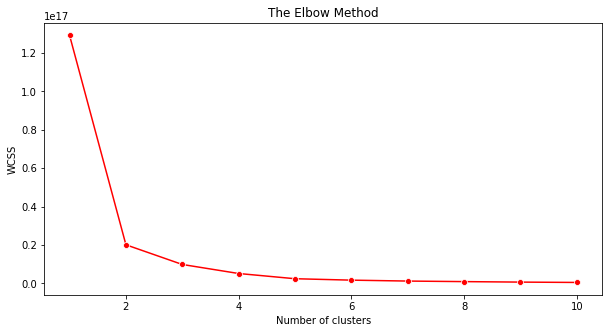

In [268]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [270]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)

In [271]:
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

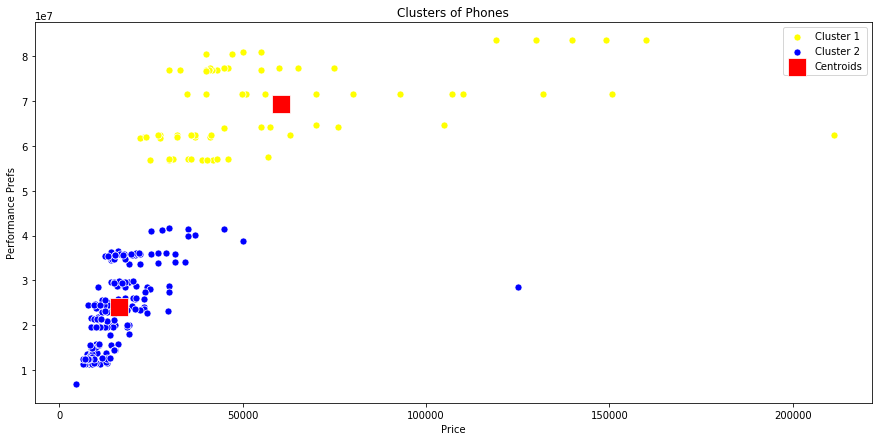

In [272]:
# Visualising the clusters
# plt.figure(figsize=(15,7))
fig, ax = plt.subplots(figsize=(15,7))
sns.scatterplot(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], color = 'grey', label = 'Cluster 4',s=50)
sns.scatterplot(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], color = 'orange', label = 'Cluster 5',s=50)
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=300,marker=',')
plt.grid(False)
plt.title('Clusters of Phones')
plt.xlabel('Price')
plt.ylabel('Performance Prefs')
plt.legend()
fig.savefig("Figures\\Performance Prefs", bbox_inches='tight',pad_inches=0.1)
plt.show()

## Display Scoring and Clustering

In [192]:
# -1 : Battery_Score
# -2 : Camera_Score
# -3 : Performance_Score
# -4 : Display_Score
df['Display Prefs'] = df['Battery_Score'] + df['Camera_Score'] + df['Performance_Score'] + 100 * df['Display_Score']

In [193]:
df.head()

,Brand,Model,Price,Released,Mass,Platform,Operating System,CPU Clock,Processor,Processor Score,RAM Capacity (converted),Non-volatile Memory Capacity (converted),RAM Type,Display Diagonal,Resolution,Pixel Density,Display Type,Graphical Controller,GPU Scores,Microphone(s),Loudpeaker(s):,Audio Output:,Expansion Interfaces,USB Connector,Max. Charging Power:,Nominal Battery Capacity,Image Sensor Pixel Size,No. of effective pixels,Aperture (W),Camera Extra Functions,Camera Extra Feat.,Secondary No. of pixels,Built-in compass,Built-in gyroscope,Voice Command,Augmented Reality (AR),Intelligent personal assistant,Voice Recognition,Face Recognition,Barometer,In-screen fingerprint sensor,Hall,Heart rate sensor,Fingerprint sensor,Light sensor,Proximity sensor,Step counter,Display_Score,Performance_Score,Camera_Score,Battery_Score,Camera Prefs,Battery Prefs,Performance Prefs,Display Prefs
0,Apple,iPhone 11 A2221 ...,55999,19-Sep,194.0,iOS,Apple iOS 13,2650,A13 Bionic,472507,4,128,4,155.0,828x1792,323,0,Apple A13 Bionic...,208697.0,3,2,0,0,0,18.0,3110,1.4,12.2,1.8,"EIS (video)\n , ...",16,12.2,1,1,1,1,1,1,1,1,0,0,0,0,1,1,0,32300,715704.0,8066.666667,21110,1.575781e+06,2.867071e+06,7.163188e+07,3.974881e+06
1,Apple,iPhone 11 A2221 ...,69990,19-Sep,194.0,iOS,Apple iOS 13,2650,A13 Bionic,472507,4,256,4,155.0,828x1792,323,0,Apple A13 Bionic...,208697.0,3,2,0,0,0,18.0,3110,1.4,12.2,1.8,"EIS (video)\n , ...",16,12.2,1,1,1,1,1,1,1,1,0,0,0,0,1,1,0,32300,715704.0,8066.666667,21110,1.575781e+06,2.867071e+06,7.163188e+07,3.974881e+06
2,Apple,iPhone 11 A2221 ...,50999,19-Sep,194.0,iOS,Apple iOS 13,2650,A13 Bionic,472507,4,64,4,155.0,828x1792,323,0,Apple A13 Bionic...,208697.0,3,2,0,0,0,18.0,3110,1.4,12.2,1.8,"EIS (video)\n , ...",16,12.2,1,1,1,1,1,1,1,1,0,0,0,0,1,1,0,32300,715704.0,8066.666667,21110,1.575781e+06,2.867071e+06,7.163188e+07,3.974881e+06
3,Apple,iPhone 11 Pro A2...,92999,19-Sep,188.0,iOS,Apple iOS 13,2650,A13 Bionic,472507,4,256,4,147.0,1125x2436,464,1,Apple A13 Bionic...,208697.0,3,2,0,0,0,18.0,3046,1.4,12.2,1.8,"EIS (video)\n , ...",16,12.2,1,1,1,1,1,1,1,1,0,0,0,0,1,1,0,46401,715704.0,8066.666667,21046,1.589818e+06,2.874772e+06,7.164591e+07,5.384917e+06
4,Apple,iPhone 11 Pro A2...,109999,19-Sep,188.0,iOS,Apple iOS 13,2650,A13 Bionic,472507,4,512,4,147.0,1125x2436,464,1,Apple A13 Bionic...,208697.0,3,2,0,0,0,18.0,3046,1.4,12.2,1.8,"EIS (video)\n , ...",16,12.2,1,1,1,1,1,1,1,1,0,0,0,0,1,1,0,46401,715704.0,8066.666667,21046,1.589818e+06,2.874772e+06,7.164591e+07,5.384917e+06


In [194]:
# specify the index of columns u want here
X = df.iloc[:, [2,-1]].values

In [195]:
X

array([[5.59990000e+04, 3.97488067e+06],
       [6.99900000e+04, 3.97488067e+06],
       [5.09990000e+04, 3.97488067e+06],
       [9.29990000e+04, 5.38491667e+06],
       [1.09999000e+05, 5.38491667e+06],
       [7.99990000e+04, 5.38491667e+06],
       [1.31900000e+05, 5.30583967e+06],
       [1.50800000e+05, 5.30583967e+06],
       [1.06999000e+05, 5.30583967e+06],
       [1.19000000e+05, 5.46876500e+06],
       [1.29900000e+05, 5.46876500e+06],
       [1.49000000e+05, 5.46876500e+06],
       [1.29900000e+05, 5.44993700e+06],
       [1.39900000e+05, 5.44993700e+06],
       [1.59900000e+05, 5.44993700e+06],
       [3.99000000e+04, 3.99241167e+06],
       [4.99000000e+04, 3.99241167e+06],
       [3.49000000e+04, 3.99241167e+06],
       [5.49990000e+04, 4.76167291e+06],
       [4.99990000e+04, 4.76167291e+06],
       [4.69990000e+04, 4.75767291e+06],
       [3.99990000e+04, 4.75767291e+06],
       [6.29990000e+04, 4.57662491e+06],
       [4.09990000e+04, 4.57262491e+06],
       [2.111370

In [196]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(X)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

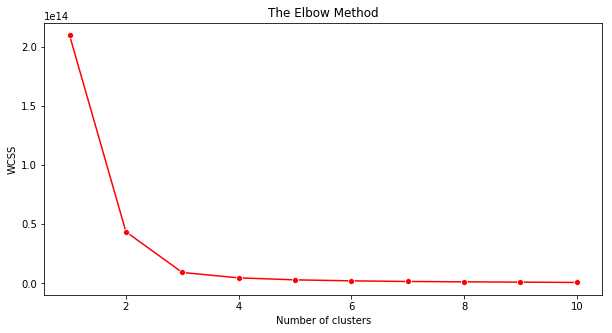

In [197]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [198]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)

In [199]:
y_kmeans

array([2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2,
       2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1])

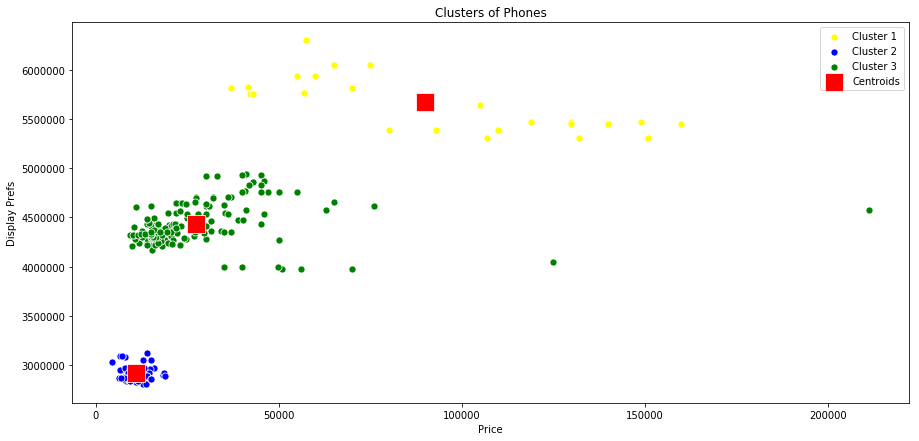

In [200]:
# Visualising the clusters
# plt.figure()
fig, ax = plt.subplots(figsize=(15,7))
sns.scatterplot(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], color = 'grey', label = 'Cluster 4',s=50)
sns.scatterplot(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], color = 'orange', label = 'Cluster 5',s=50)
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=300,marker=',')
plt.grid(False)
plt.title('Clusters of Phones')
plt.xlabel('Price')
plt.ylabel('Display Prefs')
plt.legend()
fig.savefig("Figures\\Display Prefs", bbox_inches='tight',pad_inches=0.1)
plt.show()

## Converting into Final Dataset with the Scores added

In [202]:
df.to_csv('PrefsAdded.csv')